In [1]:
import pandas as pd, numpy as np, datetime as dt, os, operator
import sqlalchemy as sql, seaborn as sns
import matplotlib.pyplot as plt

In C:\Users\Kyle\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Kyle\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Kyle\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Kyle\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Kyle\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
engine = sql.create_engine("sqlite:///../data/processed/finalData.db")

In [3]:
connection = engine.connect()

In [4]:
# Billboard
# Samples
# Yearly
# Subgenres

In [4]:
hot20_df = pd.read_sql_query("SELECT * FROM billboard", con=connection, index_col="index", parse_dates=["WeekID", "release_date"])#.info()

In [5]:
samples_df = pd.read_sql_query("SELECT * FROM samples", con=connection, index_col="index", parse_dates=["release_date"])#.info()

In [24]:
by_year = pd.read_csv("../data/raw/archive/data_by_year.csv")
by_year = by_year[(by_year.year >= 1990) & (by_year.year <= 2019)].reset_index(drop=True)

In [26]:
by_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1990,0.343075,0.533510,256029.358566,0.565779,0.131874,0.188837,-11.428037,0.064080,120.029105,0.525797,40.168327,7,1
1,1991,0.345380,0.555551,238606.873173,0.554201,0.139358,0.188347,-11.076072,0.070238,119.791474,0.559973,38.951909,7,1
2,1992,0.334324,0.555135,244357.302789,0.574860,0.106694,0.196874,-10.694651,0.072315,122.689043,0.558718,42.455179,7,1
3,1993,0.320281,0.569726,247680.364945,0.550039,0.111799,0.192186,-11.084442,0.076870,120.422309,0.555559,42.348064,7,1
4,1994,0.321046,0.549706,251335.242694,0.567885,0.117996,0.191133,-10.527020,0.075206,117.959521,0.524013,44.421991,7,1


In [41]:
subgenre_df = pd.read_sql_query("SELECT * FROM subgenres", con=connection, index_col="index")

In [34]:
song_ids = set(hot20_df.id.values)
song_keys = set(hot20_df.SongID.values)

In [42]:
subgenre_df.groupby("Top_Genre").mean()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,Occurs
Top_Genre,,,,,,,,,,,,,,
alternative,0.267822,0.540529,232914.962385,0.626186,0.078704,0.179302,-8.427653,0.067904,124.166322,0.503166,42.983714,5.037037,1.000000,1.0
country,0.373399,0.588402,210643.117200,0.574460,0.043379,0.181192,-8.769785,0.057970,122.095294,0.567153,41.014195,7.235294,1.000000,1.0
electronic,0.125229,0.640988,261687.790426,0.743491,0.227668,0.207305,-7.566153,0.080042,125.953077,0.513051,37.068944,6.268293,0.829268,1.0
hip-hop,0.157407,0.722905,241497.802934,0.668531,0.043305,0.207074,-7.187556,0.200888,119.872523,0.559636,47.341307,4.070175,0.824561,1.0
latin,0.290316,0.695323,249795.935288,0.680664,0.035741,0.182963,-7.102664,0.090628,118.037892,0.682287,47.094553,1.909091,0.909091,1.0
other,0.416300,0.502119,232521.254178,0.526930,0.160194,0.195797,-10.630268,0.072123,117.975276,0.440421,40.317269,6.080000,0.920000,1.0
pop,0.266602,0.608635,229810.503263,0.646653,0.067492,0.185294,-7.424316,0.076632,121.111422,0.518797,47.132952,5.886364,0.954545,1.0
r&b,0.325895,0.624114,257719.810923,0.550476,0.109145,0.180961,-9.742822,0.077520,115.590966,0.571963,39.740472,5.388889,0.944444,1.0
reggae,0.207375,0.666903,247571.328592,0.712252,0.038731,0.166693,-6.470408,0.119555,121.514807,0.627919,47.292912,4.666667,1.000000,1.0


In [49]:
samples_df["SongID"] = samples_df["Song"] + samples_df["Performer"]

In [243]:
samples_df.shape

(35964, 20)

In [246]:
samples_df = samples_df[~((samples_df.SongID.isin(song_keys)) | (samples_df.id.isin(song_ids)))]

<AxesSubplot:xlabel='year'>

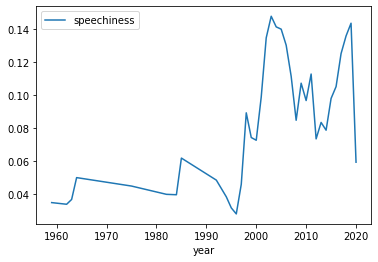

In [82]:
hot20_df.groupby("year").mean().reset_index().plot(kind="line", y="speechiness", x="year")

In [100]:
hot20_df["chart_Year"] = hot20_df["WeekID"].apply(dt.datetime.strftime, format="%Y")

<AxesSubplot:xlabel='chart_Year'>

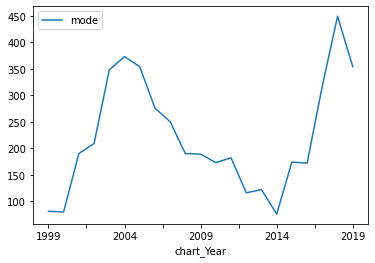

In [111]:
hot20_df.groupby(["chart_Year", "Top_Genre"]).count().reset_index()[lambda x: x.Top_Genre == "hip-hop"].plot(kind="line", x="chart_Year", y="mode")

In [119]:
hot20_df[hot20_df.chart_Year == "2009"].loc[:, ["Song", "Performer", "Top_Genre", "Week Position"]].groupby("Top_Genre").count()

,Song,Performer,Week Position
Top_Genre,,,
alternative,41,41,41
country,20,20,20
hip-hop,189,189,189
other,55,55,55
pop,691,691,691
reggae,2,2,2
rock,42,42,42


In [123]:
# Classification Questions: 
    # 1. Can We Properly Classify Popular Songs Based on Their Top Genre
    # 2. Can We Properly Discriminate Between Popular Songs and Songs Who Released In That Year Based on Their Audio Attributes?

In [153]:
hot20_df.groupby("Top_Genre").count()

,Song,Performer,Week Position,WeekID,Previous Week Position,Peak Position,Weeks on Chart,Instance,SongID,Week_No,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,timesignature,release_date,year,chart_Year
Top_Genre,,,,,,,,,,,,,,,,,,,,,
alternative,905,905,905,905,895,905,905,905,905,905,...,905,905,905,905,905,905,905,898,898,905
country,577,577,577,577,559,577,577,577,577,577,...,577,577,577,577,577,577,556,533,533,577
electronic,640,640,640,640,631,640,640,640,640,640,...,627,627,627,627,627,627,640,567,567,640
hip-hop,4676,4676,4676,4676,4531,4676,4676,4676,4676,4676,...,4676,4676,4676,4676,4676,4676,4429,4344,4340,4676
latin,105,105,105,105,103,105,105,105,105,105,...,105,105,105,105,105,105,105,104,104,105
other,1435,1435,1435,1435,1393,1435,1435,1435,1435,1435,...,1435,1435,1435,1435,1435,1435,565,1254,1167,1435
pop,11187,11187,11187,11187,10969,11187,11187,11187,11187,11187,...,11175,11175,11175,11175,11175,11175,10980,10202,10196,11187
r&b,1180,1180,1180,1180,1173,1180,1180,1180,1180,1180,...,1180,1180,1180,1180,1180,1180,1168,1038,1030,1180
reggae,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


In [204]:
hot20_df.Top_Genre.value_counts()

pop            11200
hip-hop         4695
other           1435
r&b             1180
rock            1156
alternative      905
electronic       640
country          577
latin            105
reggae            27
Name: Top_Genre, dtype: int64

In [108]:
genres_d = {'other': 1,
 'r&b': 2,
 'hip-hop': 3,
 'pop': 4,
 'country': 5,
 'rock': 6,
 'alternative': 7,
 'electronic': 8,
 'latin': 9,
 'reggae': 10}

In [202]:
hot20_df["Genre_Int"] = hot20_df.Top_Genre.apply(lambda x: genres_d[x])

In [215]:
hot20_df.columns

Index(['Song', 'Performer', 'Week Position', 'WeekID',
       'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Instance',
       'SongID', 'Week_No', 'spotify_genre', 'id', 'album', 'explicit',
       'duration', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'timesignature', 'Top_Genre', 'release_date',
       'year', 'chart_Year', 'Genre_Int'],
      dtype='object')

In [219]:
X = hot20_df.drop_duplicates(subset=["SongID"]).loc[:, ["explicit", "danceability", "energy", "valence", "speechiness", "key"]].dropna().values
Y = hot20_df.drop_duplicates(subset=["SongID"]).loc[:, ["explicit", "danceability", "energy", "valence", "speechiness", "key", "Genre_Int"]].dropna().Genre_Int.values

Text(0.5, 0.92, 'Hot100 Genres Classification')

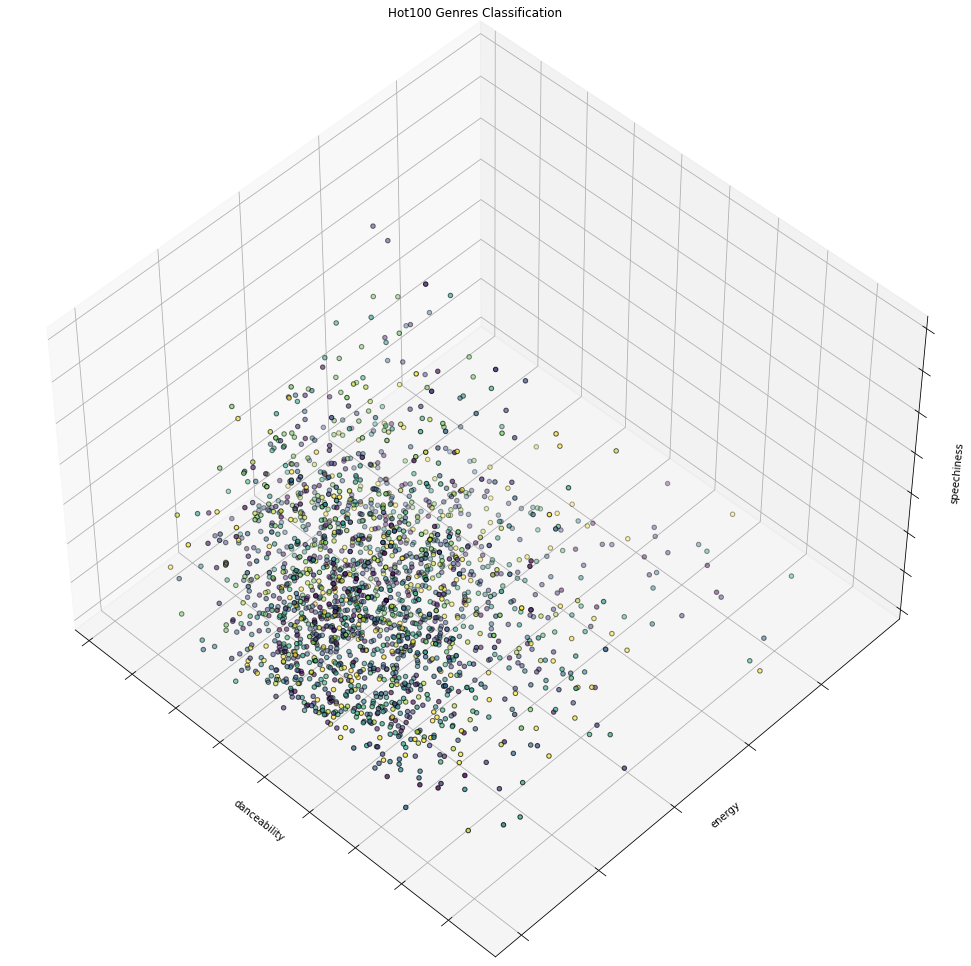

In [230]:
fig = plt.figure(1, figsize=(20, 13))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
estimator = KMeans(n_clusters=10)
estimator.fit(X)
labels = estimator.labels_

ax.scatter(X[:, 1], X[:, 2], X[:, 4],
           c=labels.astype(float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('danceability')
ax.set_ylabel('energy')
ax.set_zlabel('speechiness')
ax.set_title("Hot100 Genres Classification")

In [232]:
hot20_df.to_sql("billboard", con=engine, if_exists="replace")

In [248]:
samples_df.to_sql("samples", con=engine, if_exists="replace")

In [250]:
hot20_df.columns

Index(['Song', 'Performer', 'Week Position', 'WeekID',
       'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Instance',
       'SongID', 'Week_No', 'spotify_genre', 'id', 'album', 'explicit',
       'duration', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'timesignature', 'Top_Genre', 'release_date',
       'year', 'chart_Year', 'Genre_Int'],
      dtype='object')

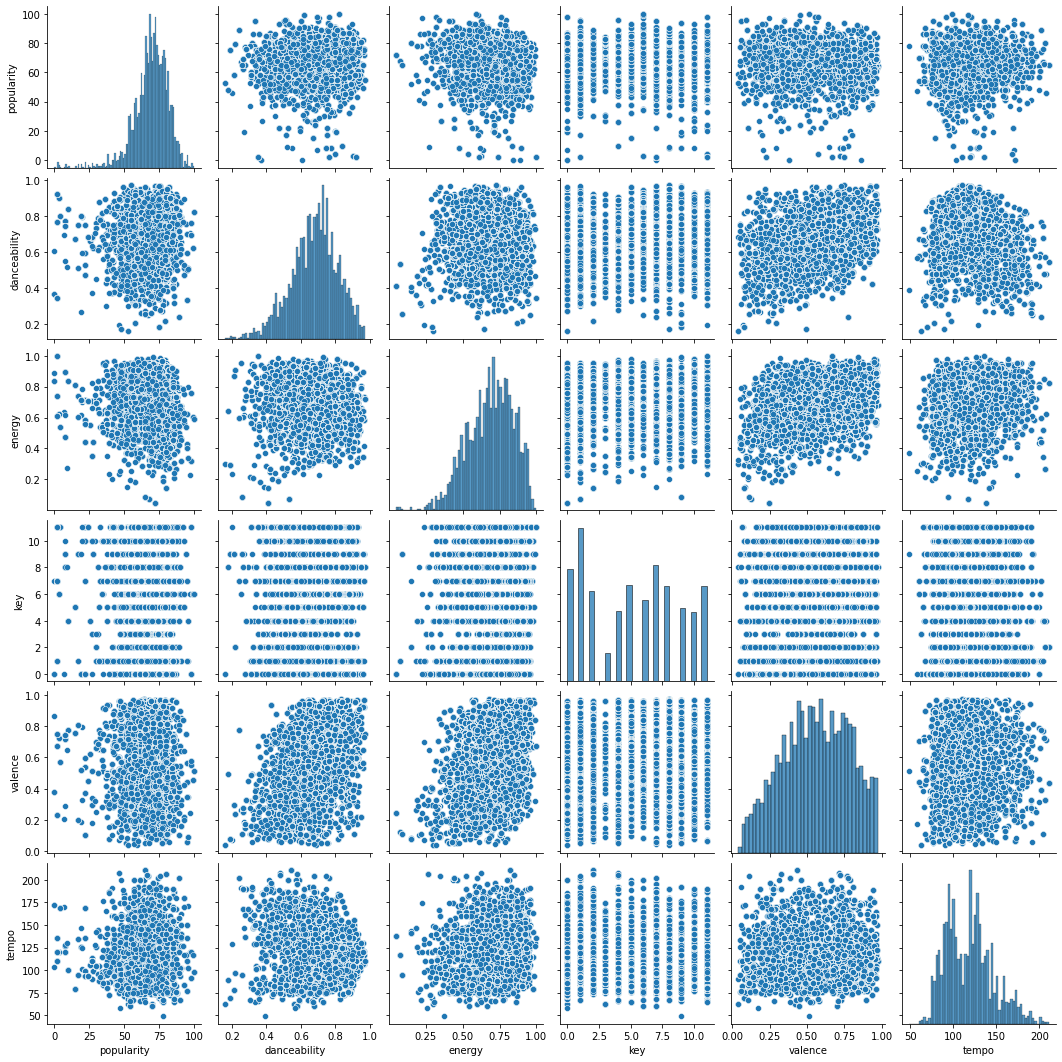

In [252]:
sns.pairplot(hot20_df.loc[:, ['popularity', 'danceability', 'energy', 'key','valence', 'tempo']])

In [57]:
len(hot20_df[(hot20_df.Top_Genre == "other")].sort_values("SongID").drop_duplicates(subset=["SongID", "Song", "Performer"]).index.values)

138

In [58]:
len(genres_l)

138

In [55]:
genres_l = ["pop", "pop", "pop", "r&b", "pop", "pop", "pop", "pop", "pop", "pop", "pop", "pop", "pop", "hip-hop", "r&b", "hip-hop",
         "pop", "pop", "r&b", "pop", "pop", "electronic", "hip-hop", "alternative", "pop", "pop", "hip-hop", "pop", "pop", "hip-hop", "hip-hop", "country", "pop",
         "r&b", "electronic", "r&b", "hip-hop", "hip-hop", "pop", "r&b", "r&b", "hip-hop", "pop", "hip-hop", "r&b", "rock", "electronic", "hip-hop", "r&b", "pop",
         "hip-hop", "r&b", "r&b", "pop", "r&b", "r&b", "r&b", "r&b", "r&b", "alternative", "electronic", "electronic", "pop", "pop", "hip-hop", "hip-hop", "pop",
         "pop", "rock", "pop", "hip-hop", "hip-hop", "rock", "pop", "hip-hop", "r&b", "pop", "hip-hop", "r&b", "hip-hop", "pop", "rock", "hip-hop", "pop", "hip-hop",
         "pop", "pop", "pop", "pop", "hip-hop", "hip-hop", "country", "hip-hop", "hip-hop", "hip-hop", "r&b", "r&b", "pop", "hip-hop", "rock", "hip-hop", "pop", "r&b",
         "country", "hip-hop", "r&b", "r&b", "r&b", "hip-hop", "pop", "rock", "r&b", "country", "electronic", "other", "r&b", "pop", "r&b", "pop", "hip-hop", "hip-hop", "r&b",
         "r&b", "electronic", "hip-hop", "pop", "pop", "r&b", "pop", "pop", "pop", "r&b", "r&b", "other", "electronic", "hip-hop", "hip-hop", "pop"]

In [256]:
df = hot20_df.loc[:, ["WeekID", "Week_No", "SongID", "Week Position"]]

In [260]:
df.pivot_table(index="SongID", columns="Week_No", values="Week Position").T

SongID,#BeautifulMariah Carey Featuring Miguel,#SELFIEThe Chainsmokers,#thatPOWERwill.i.am Featuring Justin Bieber,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,(God Must Have Spent) A Little More Time On You'N Sync,(Hot S**t) Country GrammarNelly,(When You Gonna) Give It Up To MeSean Paul Featuring Keyshia Cole,(You Drive Me) CrazyBritney Spears,...Baby One More TimeBritney Spears,...Ready For It?Taylor Swift,...,Youngblood5 Seconds Of Summer,Your Body Is A WonderlandJohn Mayer,Your BodyPretty Ricky,Your Love Is My DrugKe$ha,Your LoveNicki Minaj,ZEZEKodak Black Featuring Travis Scott & Offset,dontchangeMusiq,everything i wantedBillie Eilish,halfcrazyMusiq,iSpyKYLE Featuring Lil Yachty
Week_No,,,,,,,,,,,,,,,,,,,,,
00,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN
01,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,...,14.0,18.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
02,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,...,16.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
03,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,...,16.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
04,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,1.0,NaN,...,17.0,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN
05,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN
06,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
07,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08,NaN,NaN,NaN,16.0,8.0,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
hot20_df.groupby("Top_Genre").mean().T

Top_Genre,alternative,country,electronic,hip-hop,latin,other,pop,r&b,reggae,rock
Week Position,12.033149,13.268631,10.925000,10.867519,10.171429,10.230662,9.942589,11.052542,12.592593,11.341696
Previous Week Position,13.024581,15.262970,11.559429,11.807253,11.145631,11.221106,10.761974,12.202046,13.037037,11.772372
Peak Position,8.668508,10.251300,7.593750,7.683706,5.076190,6.728920,6.464732,8.212712,10.370370,8.102076
Weeks on Chart,17.682873,18.523397,16.098437,13.270501,18.828571,13.390941,14.975714,14.844068,15.370370,20.622837
Instance,1.187845,1.221837,1.103125,1.041321,1.028571,1.081533,1.159464,1.080508,1.000000,1.207612
explicit,0.036464,0.032929,0.032813,0.768264,0.000000,0.252962,0.168482,0.100000,0.000000,0.034602
duration,231420.572376,221406.531389,225955.279107,238187.370105,241430.390476,234727.128223,229501.565062,259196.131204,217614.185185,233439.463668
popularity,71.704972,68.445014,76.291866,69.280625,68.761905,62.045993,69.769186,61.376084,65.000000,71.275087
danceability,0.534768,0.608810,0.660477,0.738194,0.714886,0.673718,0.679394,0.682841,0.520111,0.584837
energy,0.751134,0.665761,0.750694,0.666761,0.795924,0.647095,0.693370,0.618759,0.757370,0.752297


In [59]:
data_dict = {}
for i, g in zip((hot20_df[(hot20_df.Top_Genre == "other")].sort_values("SongID").drop_duplicates(subset=["SongID", "Song", "Performer"]).index.values), genres_l):
    data_dict[i] = g

In [61]:
pd.Series(data_dict)

257             pop
19718           pop
11468           pop
575             r&b
10118           pop
            ...    
8216          other
19819    electronic
3930        hip-hop
11816       hip-hop
11943           pop
Length: 138, dtype: object

In [64]:
hot20_df_w_genres = hot20_df[(hot20_df.Top_Genre != "other")]#.sort_values("SongID").drop_duplicates(subset=["SongID", "Song", "Performer"])

In [65]:
hot20_df_wo_genres = hot20_df[(hot20_df.Top_Genre == "other")].sort_values("SongID").drop_duplicates(subset=["SongID", "Song", "Performer"])

In [67]:
d_Series = pd.Series(data_dict)

In [71]:
d_Series.name = "Top_Genre2"

In [75]:
col_key = pd.merge(hot20_df_wo_genres, d_Series, "inner", left_index=True, right_index=True).loc[:, ["SongID", "Top_Genre2"]]

In [76]:
hot20_df_wo_genres2 = hot20_df[(hot20_df.Top_Genre == "other")].sort_values("SongID")

In [82]:
col_key.dtypes

SongID        object
Top_Genre2    object
dtype: object

In [84]:
col_key.index

Int64Index([  257, 19718, 11468,   575, 10118,   271, 11672, 18903,     4,
            15241,
            ...
            15908, 12606,  8965,  9779,  2902,  8216, 19819,  3930, 11816,
            11943],
           dtype='int64', length=138)

In [87]:
hot20_leftovers = pd.merge(hot20_df_wo_genres2, col_key, "inner", on="SongID")

In [89]:
hot20_leftovers.drop(axis=1, labels="Top_Genre", inplace=True)

In [91]:
hot20_leftovers = hot20_leftovers.rename(columns={"Top_Genre2": "Top_Genre"})

In [97]:
hot20_df_w_genres.columns

Index(['Song', 'Performer', 'Week Position', 'WeekID',
       'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Instance',
       'SongID', 'Week_No', 'spotify_genre', 'id', 'album', 'explicit',
       'duration', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'timesignature', 'Top_Genre', 'release_date',
       'year', 'chart_Year', 'Genre_Int'],
      dtype='object')

In [98]:
hot20_leftovers = hot20_leftovers.loc[:, ['Song', 'Performer', 'Week Position', 'WeekID',
       'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Instance',
       'SongID', 'Week_No', 'spotify_genre', 'id', 'album', 'explicit',
       'duration', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'timesignature', 'Top_Genre', 'release_date',
       'year', 'chart_Year', 'Genre_Int']]

In [106]:
final_df = pd.concat([hot20_df_w_genres, hot20_leftovers], axis=0, ignore_index=True).sort_values(["WeekID", "Week Position"]).reset_index(drop=True)

In [107]:
hot20_df.shape == final_df.shape

True

In [109]:
final_df["Genre_Int"] = final_df.Top_Genre.apply(lambda x: genres_d[x])

In [111]:
final_df.to_sql("billboard", con=engine, if_exists="replace")

In [112]:
final_df.columns

Index(['Song', 'Performer', 'Week Position', 'WeekID',
       'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Instance',
       'SongID', 'Week_No', 'spotify_genre', 'id', 'album', 'explicit',
       'duration', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'timesignature', 'Top_Genre', 'release_date',
       'year', 'chart_Year', 'Genre_Int'],
      dtype='object')

In [13]:
hot20_df.groupby("chart_Year").count()

,Song,Performer,Week Position,WeekID,Previous Week Position,Peak Position,Weeks on Chart,Instance,SongID,Week_No,...,acousticness,instrumentalness,liveness,valence,tempo,timesignature,Top_Genre,release_date,year,Genre_Int
chart_Year,,,,,,,,,,,,,,,,,,,,,
1999,1040,1040,1040,1040,1035,1040,1040,1040,1040,1040,...,1036,1036,1036,1036,1036,989,1040,974,970,1040
2000,1060,1060,1060,1060,1059,1060,1060,1060,1060,1060,...,1060,1060,1060,1060,1060,963,1060,987,981,1060
2001,1040,1040,1040,1040,1037,1040,1040,1040,1040,1040,...,1035,1035,1035,1035,1035,960,1040,931,894,1040
2002,1040,1040,1040,1040,1040,1040,1040,1040,1040,1040,...,1040,1040,1040,1040,1040,932,1040,969,958,1040
2003,1040,1040,1040,1040,1037,1040,1040,1040,1040,1040,...,1040,1040,1040,1040,1040,1005,1040,933,933,1040
2004,1040,1040,1040,1040,1036,1040,1040,1040,1040,1040,...,1040,1040,1040,1040,1040,1014,1040,995,994,1040
2005,1060,1060,1060,1060,1055,1060,1060,1060,1060,1060,...,1047,1047,1047,1047,1047,1025,1060,1020,1020,1060
2006,1040,1040,1040,1040,1031,1040,1040,1040,1040,1040,...,1037,1037,1037,1037,1037,1017,1040,961,958,1040
2007,1040,1040,1040,1040,1027,1040,1040,1040,1040,1040,...,1040,1040,1040,1040,1040,975,1040,920,920,1040


In [15]:
hot20_df.groupby("Top_Genre").mean()

,Week Position,Previous Week Position,Peak Position,Weeks on Chart,Instance,explicit,duration,popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,timesignature,year,Genre_Int
Top_Genre,,,,,,,,,,,,,,,,,,,,,
alternative,12.077936,13.065556,8.733260,17.627881,1.186608,0.036224,231490.804610,71.572997,0.534239,0.751885,...,0.679473,0.052962,0.073170,0.005197,0.167663,0.442626,129.072450,3.952799,2005.145072,7.0
country,13.267101,15.265546,10.151466,18.234528,1.208469,0.030945,221639.193178,68.444255,0.599209,0.669289,...,0.825733,0.048204,0.202446,0.000249,0.135938,0.542341,128.712627,4.014035,2008.208772,5.0
electronic,10.970270,11.727023,7.675676,15.798649,1.089189,0.028378,225675.822558,75.870702,0.646499,0.728113,...,0.585970,0.080209,0.143912,0.030312,0.168367,0.490565,119.488807,4.000000,2014.460317,8.0
hip-hop,10.821655,11.761992,7.646477,13.294339,1.043745,0.769794,237578.973801,68.951214,0.735784,0.667303,...,0.589667,0.195388,0.125058,0.006430,0.194207,0.551087,118.963836,4.029027,2009.390884,3.0
latin,10.171429,11.145631,5.076190,18.828571,1.028571,0.000000,241430.390476,68.761905,0.714886,0.795924,...,0.523810,0.080329,0.183510,0.000064,0.147902,0.621114,139.178495,4.000000,2009.384615,9.0
other,14.500000,18.181818,10.750000,5.500000,1.000000,0.000000,198561.833333,61.250000,0.478333,0.305000,...,0.000000,0.052733,0.233000,0.000040,0.149125,0.436917,114.575417,4.000000,2010.666667,1.0
pop,9.917631,10.738315,6.397464,14.888615,1.158696,0.165589,229316.133382,69.335149,0.679980,0.692778,...,0.589523,0.089002,0.149120,0.008447,0.168747,0.573329,117.774771,3.980543,2009.266917,4.0
r&b,10.942308,12.030040,8.128647,14.507294,1.070292,0.092175,259513.974019,60.491896,0.686530,0.607609,...,0.522546,0.093939,0.217369,0.002507,0.160101,0.573378,110.431081,3.975362,2003.299461,2.0
reggae,12.592593,13.037037,10.370370,15.370370,1.000000,0.000000,217614.185185,65.000000,0.520111,0.757370,...,0.518519,0.058763,0.192315,0.000088,0.110756,0.498074,110.938556,4.518519,2009.592593,10.0


In [ ]:
["explicit", "duration", "danceability", "energy", "loudness", "mode", "speechiness", "acousticness", "valence", "tempo", "instrumentalness"]

In [48]:
y = (2005,)
results = connection.execute("SELECT Top_Genre, AVG(explicit), AVG(duration), AVG(danceability), AVG(energy), AVG(loudness), AVG(mode), AVG(speechiness), AVG(acousticness), AVG(valence), AVG(tempo), AVG(instrumentalness)  FROM billboard WHERE chart_Year = ? GROUP BY chart_Year, Top_Genre", y)

In [64]:
pd.read_sql("SELECT Top_Genre, COUNT(SONGID), AVG(explicit), AVG(duration), AVG(danceability), AVG(energy), AVG(loudness), AVG(mode), AVG(speechiness), AVG(acousticness), AVG(valence), AVG(tempo), AVG(instrumentalness) FROM billboard WHERE chart_Year = 2001 GROUP BY chart_Year, Top_Genre", con=connection)

,Top_Genre,COUNT(SONGID),AVG(explicit),AVG(duration),AVG(danceability),AVG(energy),AVG(loudness),AVG(mode),AVG(speechiness),AVG(acousticness),AVG(valence),AVG(tempo),AVG(instrumentalness)
0,alternative,48,0.000000,221196.458333,0.519917,0.839229,-5.044958,0.875000,0.034006,0.002053,0.468896,129.682313,0.000002
1,country,44,0.295455,229247.022727,0.585682,0.578295,-6.905727,0.772727,0.030877,0.255305,0.554409,119.806614,0.000002
2,electronic,10,0.000000,229733.000000,0.610000,0.723000,-7.572000,1.000000,0.042200,0.010300,0.450000,97.147000,0.044700
3,hip-hop,218,0.573394,228237.611313,0.765090,0.714106,-5.896285,0.582569,0.230314,0.147453,0.705231,121.604519,0.009019
4,pop,400,0.127500,245134.268354,0.652494,0.666853,-5.890078,0.670886,0.087181,0.169500,0.584790,108.098803,0.023831
5,r&b,217,0.000000,258282.963134,0.712438,0.669014,-5.543691,0.322581,0.078978,0.196100,0.684290,104.672622,0.004169
6,rock,103,0.213592,239555.038835,0.568136,0.788573,-5.317641,0.728155,0.043560,0.016992,0.517066,105.286408,0.001978


In [68]:
pd.read_sql("SELECT Top_Genre, AVG(explicit) explicit, AVG(duration) duration, AVG(danceability) danceability, AVG(energy) energy, AVG(loudness) loudness, AVG(mode) mode, AVG(speechiness) speechiness, AVG(acousticness) acousticness, AVG(valence) valence, AVG(tempo) tempo, AVG(instrumentalness) instrumentalness FROM (SELECT DISTINCT SongID, Top_Genre, explicit, duration, danceability, energy, loudness, mode, speechiness, acousticness, valence, tempo, instrumentalness FROM billboard WHERE chart_Year = 2010) GROUP BY Top_Genre", con=connection).to_json(orient="records")

'[{"Top_Genre":"alternative","explicit":0.0,"duration":242840.0,"danceability":0.521,"energy":0.702,"loudness":-5.189,"mode":1.0,"speechiness":0.0331,"acousticness":0.189,"valence":0.25,"tempo":127.976,"instrumentalness":0.0},{"Top_Genre":"country","explicit":0.0,"duration":284946.25,"danceability":0.5995,"energy":0.6405,"loudness":-5.78825,"mode":1.0,"speechiness":0.03545,"acousticness":0.249175,"valence":0.45475,"tempo":117.64625,"instrumentalness":0.000469},{"Top_Genre":"electronic","explicit":0.0,"duration":205733.0,"danceability":0.686,"energy":0.898,"loudness":-2.72,"mode":0.0,"speechiness":0.052,"acousticness":0.000698,"valence":0.696,"tempo":122.985,"instrumentalness":0.0000461},{"Top_Genre":"hip-hop","explicit":0.8260869565,"duration":271730.2193330716,"danceability":0.6187449337,"energy":0.7805776792,"loudness":-4.6894371213,"mode":0.5652173913,"speechiness":0.2319301925,"acousticness":0.1293637491,"valence":0.5067863289,"tempo":121.0113908587,"instrumentalness":0.0019861218}

In [ ]:
"SELECT Top_Genre, AVG(explicit), AVG(duration), AVG(danceability), AVG(energy), AVG(loudness), AVG(mode), AVG(speechiness), AVG(acousticness), AVG(valence), AVG(tempo), AVG(instrumentalness ) FROM (SELECT DISTINCT SongID, Top_Genre, explicit, duration, danceability, energy, loudness, mode, speechiness, acousticness, valence, tempo, instrumentalness FROM billboard WHERE chart_Year = 2010) GROUP BY Top_Genre"

In [5]:
hot20_df.head()

,Song,Performer,Week Position,WeekID,Previous Week Position,Peak Position,Weeks on Chart,Instance,SongID,Week_No,...,instrumentalness,liveness,valence,tempo,timesignature,Top_Genre,release_date,year,chart_Year,Genre_Int
index,,,,,,,,,,,,,,,,,,,,,
0,I'm Your Angel,R. Kelly & Celine Dion,1,1999-01-02,1.0,1.0,5.0,1.0,I'm Your AngelR. Kelly & Celine Dion,00,...,0.000000,0.110000,0.266000,112.681000,4.0,r&b,1996-01-01,1996.0,1999,2
1,Nobody's Supposed To Be Here,Deborah Cox,2,1999-01-02,2.0,2.0,14.0,1.0,Nobody's Supposed To Be HereDeborah Cox,00,...,0.000012,0.595000,0.399000,119.957000,4.0,r&b,1998-09-17,1998.0,1999,2
2,Lately,Divine,3,1999-01-02,3.0,1.0,17.0,1.0,LatelyDivine,00,...,0.105239,0.154222,0.618919,105.805541,4.0,hip-hop,1999-01-01,1999.0,1999,3
3,...Baby One More Time,Britney Spears,4,1999-01-02,5.0,4.0,7.0,1.0,...Baby One More TimeBritney Spears,00,...,0.000131,0.443000,0.907000,92.960000,4.0,pop,1999-01-12,1999.0,1999,4
4,Because Of You,98 Degrees,5,1999-01-02,6.0,3.0,14.0,1.0,Because Of You98 Degrees,00,...,0.000000,0.113000,0.514000,104.498000,NaN,pop,1998-01-01,1998.0,1999,4


In [11]:
normalization_key = hot20_df.agg({"duration": ["min", "max"],
            "loudness": ["min", "max"],
            "tempo": ["min", "max"]}).values

In [30]:
def scale_attr(number, keyword=None):
    scaler_dict = {"duration": 0, "loudness": 1, "tempo": 2}
    if keyword == None:
        raise KeyError(f"You Must Choose an appropiate key axis: {[k for k in scaler_dict.keys()]}")
    column_number = scaler_dict[keyword]
    minimum = normalization_key[0][column_number]
    maximum = normalization_key[1][column_number]
    return (number - minimum) / (maximum - minimum)

In [26]:
normalization_key[1][0]

688453.0

In [31]:
scale_attr(119.957, "tempo")

0.43966006714723016

In [37]:
hot20_df_normalized = hot20_df.copy(deep=True)

In [38]:
hot20_df_normalized.tempo = hot20_df_normalized.tempo.apply(scale_attr, keyword="tempo")

In [39]:
hot20_df_normalized.duration = hot20_df_normalized.duration.apply(scale_attr, keyword="duration")

In [40]:
hot20_df_normalized.loudness = hot20_df_normalized.loudness.apply(scale_attr, keyword="loudness")

In [41]:
hot20_df_normalized.to_sql("billboard_normalized", con=connection)

In [42]:
connection.close()